# Vision
Experimental code to get the digit recognition stuff to work.

1. Read the training data (and draw them out in a pretty image)
2. Train with this training input
3. Test against examples from testing data (which should be inputted from some GUI at some point).

## 1. Read Training Data
Also drawing out the trained digits 

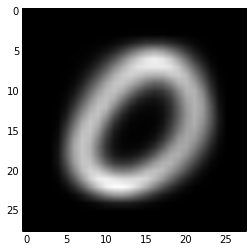

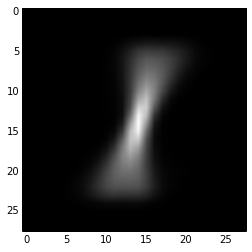

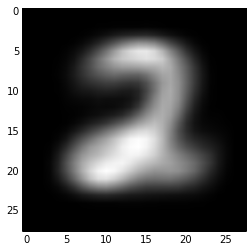

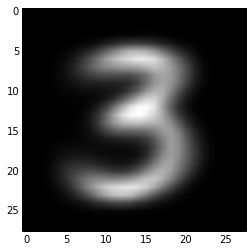

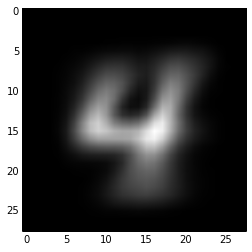

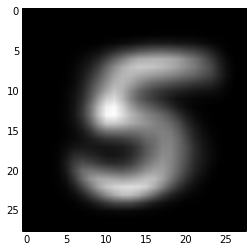

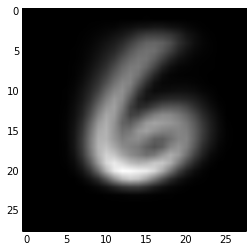

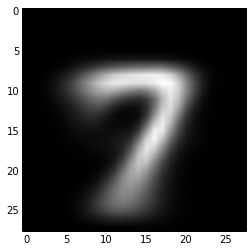

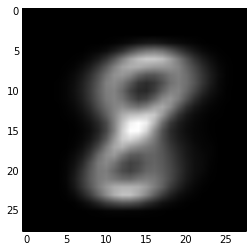

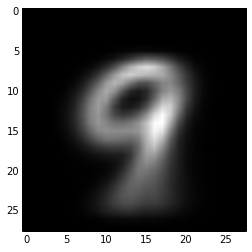

In [21]:
import os, struct
from array import array as pyarray
from numpy import append, arange, array, int8, uint8, zeros

from pylab import *
from numpy import *
import math

%matplotlib inline
import matplotlib.pyplot as plt

def load_mnist(dataset="training", digits=arange(10), path="."):
    """
    Loads MNIST files into 3D numpy arrays

    Adapted from: http://abel.ee.ucla.edu/cvxopt/_downloads/mnist.py
    """

    if dataset == "training":
        fname_img = os.path.join(path, '../training/images')
        fname_lbl = os.path.join(path, '../training/labels')
    elif dataset == "testing":
        fname_img = os.path.join(path, '../testing/images')
        fname_lbl = os.path.join(path, '../testing/labels')
    else:
        raise ValueError("dataset must be 'testing' or 'training'")

    flbl = open(fname_lbl, 'rb')
    magic_nr, size = struct.unpack(">II", flbl.read(8))
    lbl = pyarray("b", flbl.read())
    flbl.close()

    fimg = open(fname_img, 'rb')
    magic_nr, size, rows, cols = struct.unpack(">IIII", fimg.read(16))
    img = pyarray("B", fimg.read())
    fimg.close()

    ind = [ k for k in range(size) if lbl[k] in digits ]
    N = len(ind)

    images = zeros((N, rows, cols), dtype=uint8)
    labels = zeros((N, 1), dtype=int8)
    for i in range(len(ind)):
        images[i] = array(img[ ind[i]*rows*cols : (ind[i]+1)*rows*cols ]).reshape((rows, cols))
        labels[i] = lbl[ind[i]]

    return images, labels

def parse_images():
    result = []
    for digit in range(0,10):
        # image is the image array, label is the label of the image (e.g. "9").
        images, labels = load_mnist('training', digits=[digit])
        image_count = np.full((28, 28), 0.0)
        
        # for each image, if there is a pixel with a value greater than 127.5, 
        # then set it to 1 (AKA True). Otherwise 0 (AKA False)
        for image in images:
            image = np.divide(image, 450.0)
            image = np.rint(image)
            image_count += image
        
        # reduce the count to be an average between 0 and 1 (AKA probability).
        image_count = np.divide(image_count, len(images))
        result.append(image_count)
        plt.figure()
        plt.subplot(1, 1, 1)
        plt.imshow(image_count, cmap = 'gray')
    return result

digits = parse_images()
        

## Create a CPT out of Training Data

In [22]:
# generates a conditional probability table out of a given list of digits

def generate_cpt(lod):
    result = np.full((28, 28, 10), 0.01)
    for index_y, y in enumerate(result):
        for index_x, x in enumerate(y):
            for index_d, digit in enumerate(lod):
                if digit[index_y][index_x] == 0.0:
                    x[index_d] = 0.01
                else:
                    x[index_d] = digit[index_y][index_x]
            
    return result

cpt = generate_cpt(digits)

## Test CPT against Examples

0: Failed 17, Passed: 963
   Failed 1, Passed: 98
1: Failed 433, Passed: 702
   Failed 38, Passed: 61
2: Failed 159, Passed: 873
   Failed 15, Passed: 84
3: Failed 202, Passed: 808
   Failed 20, Passed: 80
4: Failed 395, Passed: 587
   Failed 40, Passed: 59
5: Failed 691, Passed: 201
   Failed 77, Passed: 22
6: Failed 145, Passed: 813
   Failed 15, Passed: 84
7: Failed 293, Passed: 735
   Failed 28, Passed: 71
8: Failed 91, Passed: 883
   Failed 9, Passed: 90
9: Failed 294, Passed: 715
   Failed 29, Passed: 70


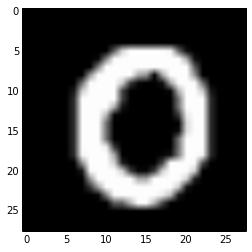

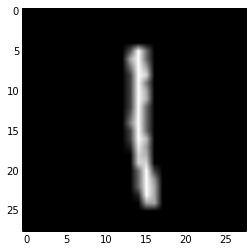

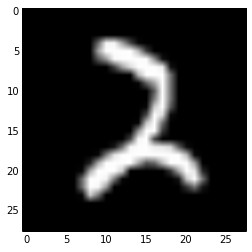

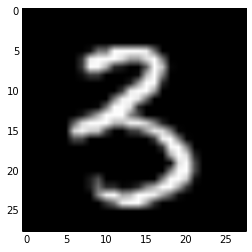

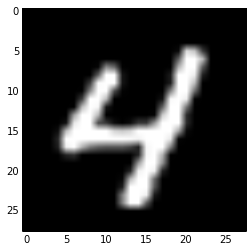

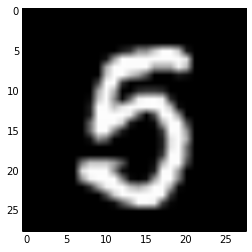

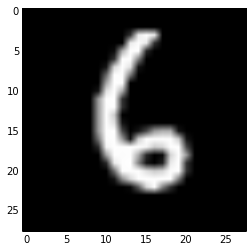

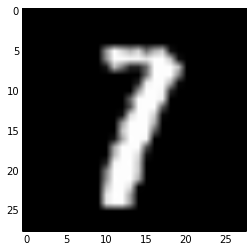

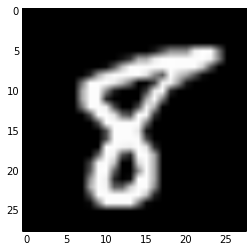

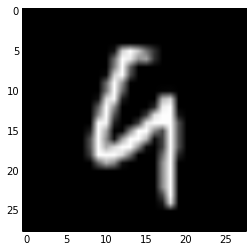

In [23]:
# test a given digit
# so far only 7 and 0 are passing
def testing(digit):
    images, labels = load_mnist('testing', digits=[digit])
    plt.figure()
    plt.subplot(1, 1, 1)
    plt.imshow(images[500], cmap = 'gray')
    correctness = []
    for testing_image in images:
        # all digits start off with a 1/10 probability of occuring.
        labels_probability = np.full(10, 0.1)
        
        # normalize testing image
        testing_image = np.divide(testing_image, 450.0)
        testing_image = np.rint(testing_image)
        
        for index_y, y in enumerate(testing_image):
            for index_x, value in enumerate(y):
                # if it's not black
                if value == 1.0:
                    labels_probability *= cpt[index_y][index_x]
                    
        predicted_label = np.argmax(labels_probability)
        correctness.append(predicted_label == digit)
    correctness_count = np.bincount(correctness)
    if len(correctness_count) is 1:
        print "%d: All Failure" % (digit)
    else:
        failures = float(np.bincount(correctness)[0]) + 0.0
        successes = float(np.bincount(correctness)[1])  + 0.0
        failure_rate = failures / (failures + successes)
        success_rate = 1.0 - failure_rate
        print "%d: Failed %d, Passed: %d" % (digit, failures, successes)
        print "   Failed %d, Passed: %d" % (failure_rate * 100, success_rate * 100)
    
for digit in range(0, 10):
    testing(digit)